### Tasks:
- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

### Analyst Objectives:
- A clear summary of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of your analysis
- Supporting visualizations and key findings
- Your top high-level content recommendations based on your analysis

### Key Notes (Ask Phase):
At this stage, our objective is to find trends in the use of non-Bellabeat smart devices by consumers in order to analyse how these trends would influence Bellabeat's decision making and drive change in its marketing strategy. 
Any underlying trends, changes in behaviour, and patterns may uncover insights that may have been overlooked before and assist both market experts and stakeholders (investors, CEO, CTO, and CFO) understand current smart device landscape, consumer demand, and behaviour; and adjust company strategy accordingly.

### Dataset at a glimpse
- The data we receive is a collection of multiple fitbit users, a competing smart device manufacturer capable of the same thing that Bellabeat's Leaf does - tracking user physical activity, heartbeat, and sleep cycles amongst other things. 
- There are multiple source files that we can use to draw some insights on, but first we will need to validate it. At a glimpse, since the data is collected direct from the smart device itself, we will take its integrity with a hint of salt, as there may be outlier users which may display anomalous behaviour - see detailed notes for more information. 
- The dataset is open source, and the disclosure of this data is done so via consent from users - which means that the data we are using is volunatary. User IDs will be anonymized.

### Limitations
- The population size of this dataset is only 33 people. 
- Weight logs cover only 8 IDs
- Sleep logs cover only 24 IDs
- Sleep minutes cover 24 IDs
- Heart rate logs cover only 14 IDs
- Weight logs have only 8 IDs.

All things considered, this is VERY limited. There isn't enough data to make an informed decision.

### Assumptions
- Since the company makes products exclusively for women, we must assume that Bellabeat's users are strictly female. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# retrieve data from files
dailyActivity = pd.read_csv('/home/twinblade02/Documents/Datasets/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv', parse_dates=True)
dailyCalories = pd.read_csv('/home/twinblade02/Documents/Datasets/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv', parse_dates=True)
hourlyIntensities = pd.read_csv('/home/twinblade02/Documents/Datasets/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv', parse_dates=True)
sleepDay = pd.read_csv('/home/twinblade02/Documents/Datasets/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv', parse_dates=True)

In [3]:
# check unique IDs to determine the population size, cross check with others
#print(dailyActivity['Id'].nunique(), dailyCalories['Id'].nunique(), 
#      dailyIntensities['Id'].nunique(), minuteSleep['Id'].nunique(),
#      weightLogs['Id'].nunique())

### EDA
#### - User Daily Activity / Usage

Selected datasets:
- dailyActivity
- dailyCalories
- sleepDay
- weightLogs

In [4]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
# check columns for this dataframe
print(dailyActivity.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [6]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
dailyCalories.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [8]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


### Insights:
- By daily activity, users fall in the 'Lightly Active' range, averaging about 3.4 hours.
- Users display relatively high sedentary behaviour on average - about 16 hours. This value may need to be controlled and reduced. We need more context as to what this behaviour may be, such as work time, or engagement in recreational activity. User age and gender may give us some insight, which we do not have.
- Average steps per day is approximately 7600 steps. 
- Users sleep approximately 7 hours per day.

### Cleaning datetime objects:

In [9]:
import datetime as dt

In [10]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [11]:
dailyCalories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [12]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [13]:
dailyActivity['ActivityDate'] = dailyActivity['ActivityDate'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))

In [14]:
dailyActivity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [15]:
sleepDay['date'] =sleepDay['SleepDay'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [16]:
sleepDay = sleepDay.drop(['SleepDay'], axis=1)

In [17]:
sleepDay['date'] = pd.to_datetime(sleepDay['date'].dt.date)
sleepDay

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
0,1503960366,1,327,346,2016-04-12
1,1503960366,2,384,407,2016-04-13
2,1503960366,1,412,442,2016-04-15
3,1503960366,2,340,367,2016-04-16
4,1503960366,1,700,712,2016-04-17
...,...,...,...,...,...
408,8792009665,1,343,360,2016-04-30
409,8792009665,1,503,527,2016-05-01
410,8792009665,1,415,423,2016-05-02
411,8792009665,1,516,545,2016-05-03


Dropping weight data due to small size, there's no point in analyzing that since it does not accurately represent the given population sample.

### Visualizations for Daily Activity

In [18]:
ID_steps = dailyActivity.groupby(['Id'], as_index=False)['TotalSteps'].mean()

<AxesSubplot:xlabel='TotalSteps', ylabel='Count'>

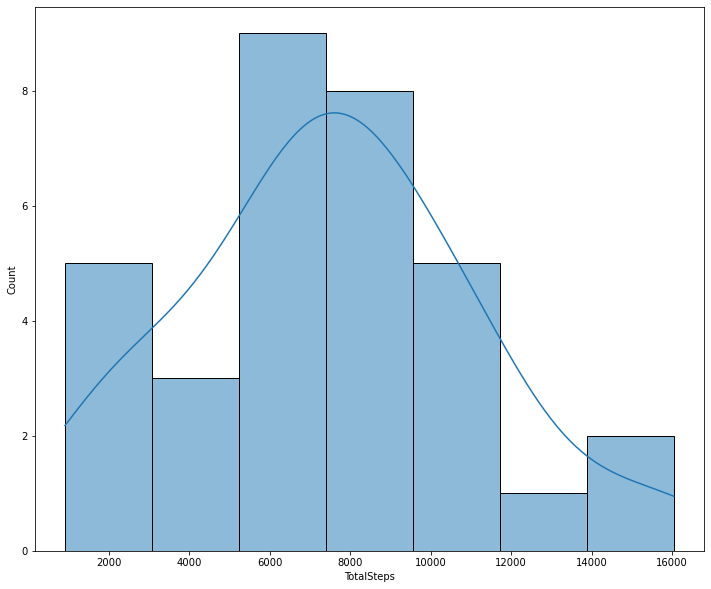

In [19]:
plt.figure(figsize=(12,10))
sns.histplot(data=ID_steps, x='TotalSteps', kde=True)

Above histplot tells us that the average steps taken by users are across the 1000 to 3500 range, 5000 to 9500 range, and drops off considerably above 10000 steps. 

In [20]:
ID_activeHours = dailyActivity.groupby(['Id'], as_index=False)['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'].mean() / 60

/tmp/ipykernel_49305/2124618013.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ID_activeHours = dailyActivity.groupby(['Id'], as_index=False)['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'].mean() / 60


In [21]:
hours_dict = {'VeryActiveMinutes':'Avg_VeryActiveHours','FairlyActiveMinutes':'Avg_FairlyActiveHours',
             'LightlyActiveMinutes':'Avg_LightlyActiveHours','SedentaryMinutes':'Avg_SedentaryHours'}

ID_activeHours = ID_activeHours.rename(columns=hours_dict)

In [22]:
ID_activeHours.head(10)

,Id,Avg_VeryActiveHours,Avg_FairlyActiveHours,Avg_LightlyActiveHours,Avg_SedentaryHours
0,2.506601e+07,0.645161,0.319355,3.665591,14.136022
1,2.707633e+07,0.144624,0.096774,2.558065,20.962366
2,2.740717e+07,0.159444,0.356111,2.974444,19.364444
3,3.074175e+07,0.002151,0.021505,1.924194,20.110215
4,3.213287e+07,0.022043,0.012903,0.643011,21.956989
5,3.370807e+07,0.604839,0.322581,4.290860,18.543011
6,3.377253e+07,0.001613,0.004301,4.277419,11.490323
7,3.866878e+07,0.022581,0.043011,3.303226,20.334946
8,3.911946e+07,0.225000,0.342593,4.208333,11.452778
9,4.788688e+07,0.234946,0.102151,5.133333,18.286559


<AxesSubplot:xlabel='Avg_SedentaryHours', ylabel='Count'>

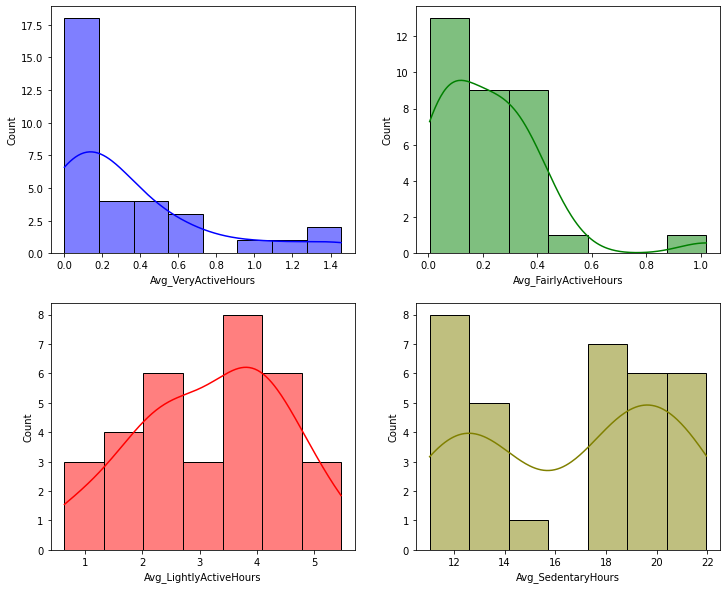

In [23]:
fig, axes = plt.subplots(2,2,figsize=(12,10))
sns.histplot(data=ID_activeHours, x='Avg_VeryActiveHours', kde=True, color='blue', ax=axes[0,0])
sns.histplot(data=ID_activeHours, x='Avg_FairlyActiveHours', kde=True, color='green', ax=axes[0,1])
sns.histplot(data=ID_activeHours, x='Avg_LightlyActiveHours', kde=True, color='red', ax=axes[1,0])
sns.histplot(data=ID_activeHours, x='Avg_SedentaryHours', kde=True, color='olive', ax=axes[1,1])

- Subplot 1 
    - A majority of the users in this dataset are not being classified as very active.
    - Any notable very active hours range between 20 minutes and 1.4 hours.
- Subplot 2 
    - About 18 users have fairly active hours ranging from about 20 minutes to 1 hour. 
- Subplot 3
    - Most users have lightly active hours, ranging between 1 to 6 hours per day. 
- Subplot 4
    - All users have high sedentary hours, ranging between 10 to 22 hours. 

<AxesSubplot:>

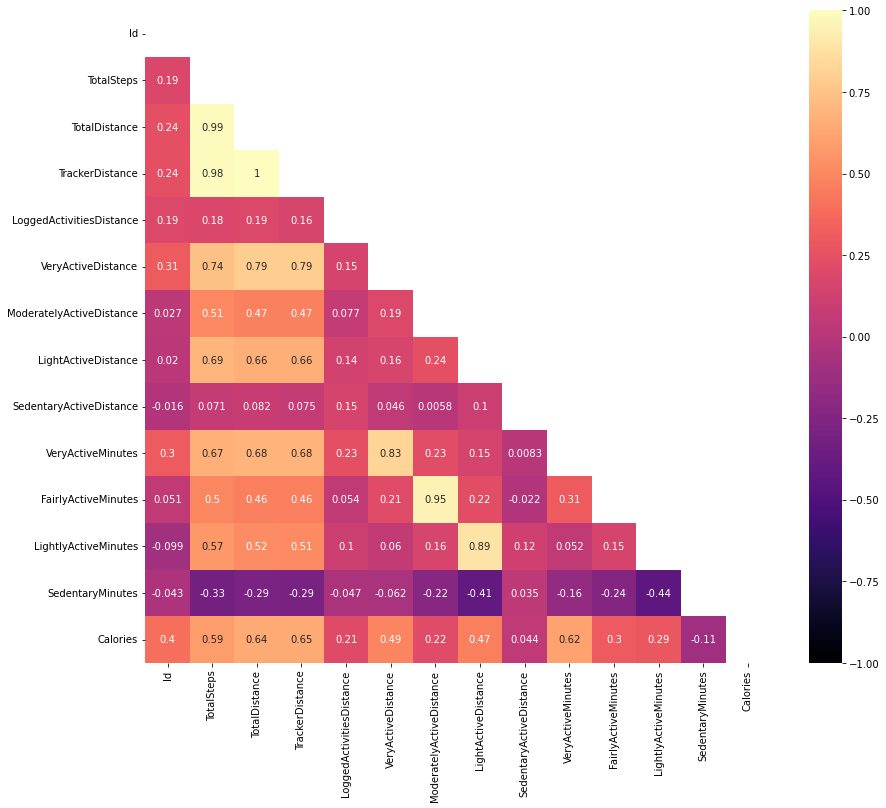

In [24]:
# correlation heatmap - with map because its easy to read
corr_dailyActivity = dailyActivity.corr()
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_dailyActivity, dtype=bool))

sns.heatmap(corr_dailyActivity, mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')

Positive correlations exist between active minutes and total distance and steps, as well as each level of active minutes. There is a fair correlation between calories burnt and distance travelled, and active minutes. 

Plotting a slight positive correlation (Steps -> Calories):

<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

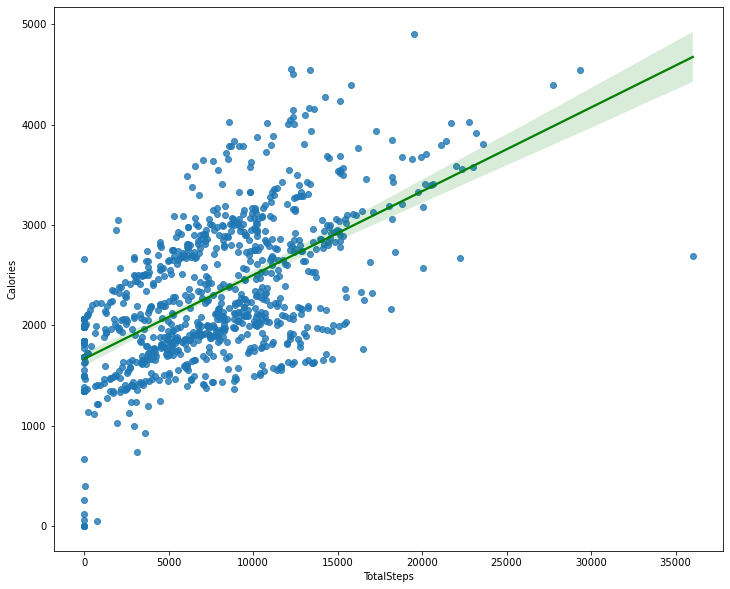

In [25]:
plt.figure(figsize=(12,10))
sns.regplot(data=dailyActivity, x='TotalSteps', y='Calories', line_kws={'color':'green'})

There's a postive correlation between total steps taken, and calories burnt - which is a given since you burn more energy with an increase in physical activity. 

Similarly, plotting for negative correlation:

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='LightlyActiveMinutes'>

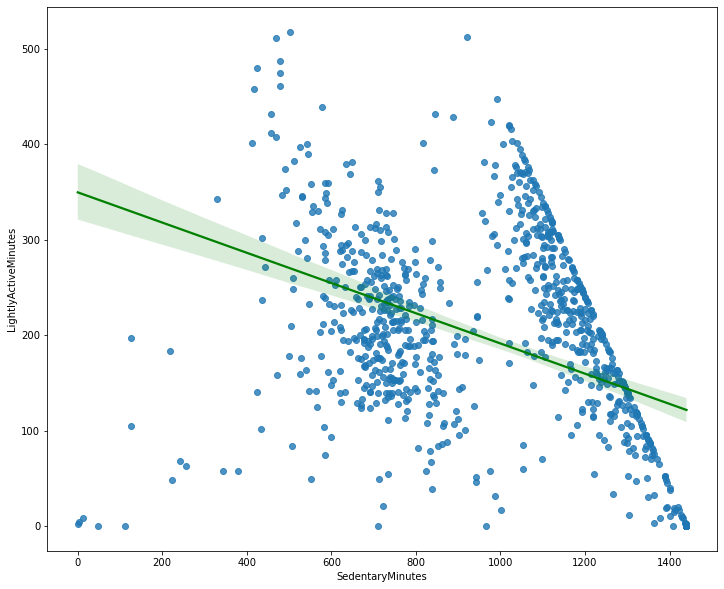

In [26]:
plt.figure(figsize=(12,10))
sns.regplot(data=dailyActivity, x='SedentaryMinutes', y='LightlyActiveMinutes', line_kws={'color':'green'})

While this shows some semblance of linearity, we've established that these variables negatively correlated. There could be a pattern worth exploring with sleep and activity. 

### Merging sleep and activity tables

In [27]:
sleep_activity = sleepDay.merge(dailyActivity, how='inner', on='Id')

In [28]:
sleep_activity

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,1,327,346,2016-04-12,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,1,327,346,2016-04-12,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,1,327,346,2016-04-12,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,1,327,346,2016-04-12,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,1,327,346,2016-04-12,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,8792009665,1,439,463,2016-05-04,2016-05-06,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
12437,8792009665,1,439,463,2016-05-04,2016-05-07,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
12438,8792009665,1,439,463,2016-05-04,2016-05-08,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
12439,8792009665,1,439,463,2016-05-04,2016-05-09,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688


In [29]:
# average sleep cycle per day by user
# sleep_activity.groupby(['date','Id'])['TotalMinutesAsleep'].mean()
# average sleep cycle for each date + Calories burned
AvgSleepByDate = sleep_activity.groupby(['date'], as_index=False).agg({'TotalMinutesAsleep':'mean', 'Calories':'mean'})

In [30]:
AvgSleepByDate = AvgSleepByDate.rename(columns={'TotalMinutesAsleep':'TotalHoursAsleep'})
AvgSleepByDate['TotalHoursAsleep'] = AvgSleepByDate['TotalHoursAsleep'].apply(lambda x: x/60)

In [31]:
AvgSleepByDate

,date,TotalHoursAsleep,Calories
0,2016-04-12,7.372013,2290.416040
1,2016-04-13,7.191383,2262.436893
2,2016-04-14,7.427297,2287.732283
3,2016-04-15,7.125545,2257.386139
4,2016-04-16,6.595126,2355.162736
5,2016-04-17,7.696469,2350.562147
6,2016-04-18,6.920719,2477.486301
7,2016-04-19,6.788021,2343.326923
8,2016-04-20,7.439483,2371.766376
9,2016-04-21,6.211409,2321.823266


<AxesSubplot:xlabel='TotalHoursAsleep', ylabel='Count'>

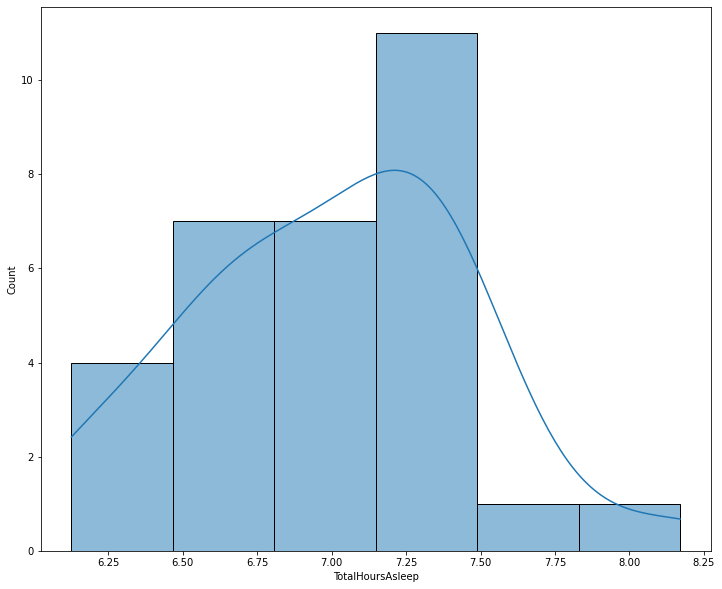

In [32]:
# visualize total hours asleep
plt.figure(figsize=(12,10))
sns.histplot(data=AvgSleepByDate, x='TotalHoursAsleep', kde=True)

Validating our previous observation, a large number of users sleep for about 7.25 hours. This also tells us that users don't get the recommended 8 hours of sleep recommended by health experts - however, we do know that 6 hours on average is a minimum. 

<AxesSubplot:ylabel='TotalHoursAsleep'>

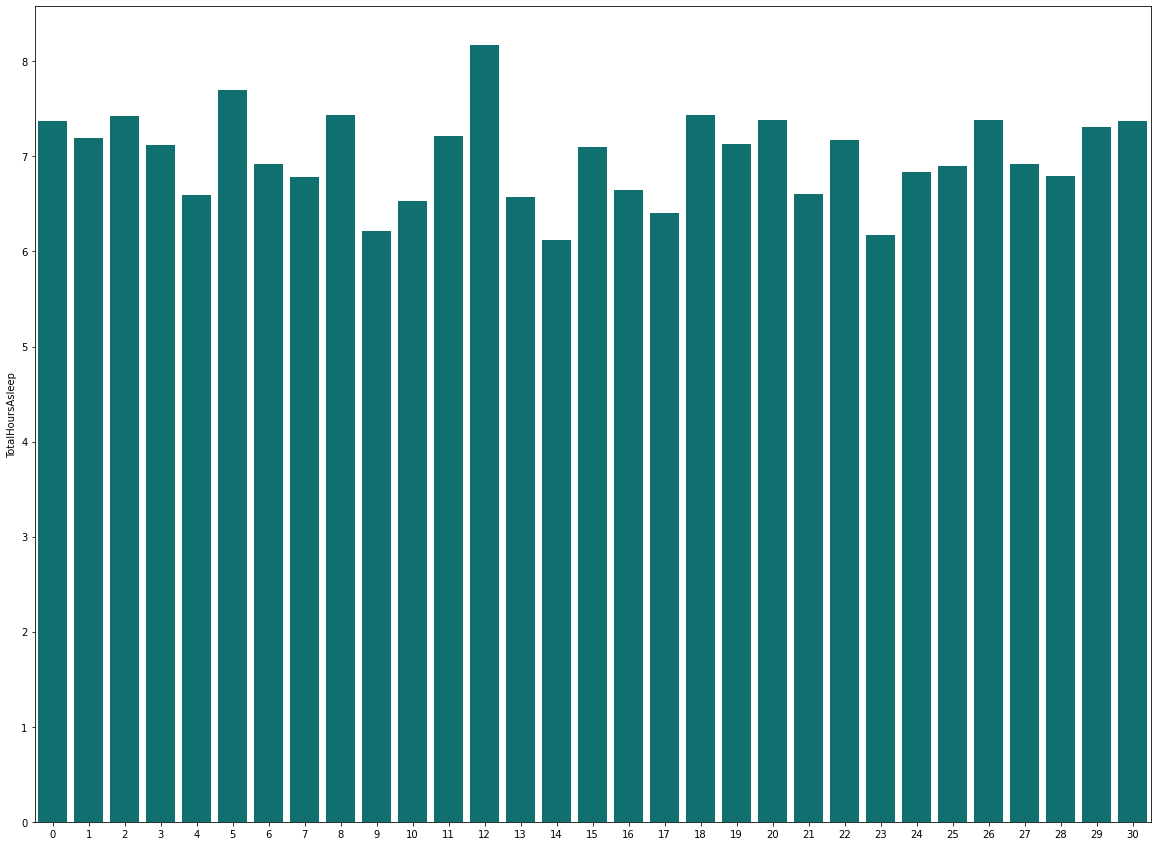

In [33]:
plt.figure(figsize=(20,15))
sns.barplot(data=AvgSleepByDate, x=AvgSleepByDate.index, y='TotalHoursAsleep', color='teal')

Plot above shows average sleep patterns of users by the day. Note that the labels go from 0 to 30 - this represents the index of the data as it appears in the dataframe. In actuality, data collection begins on the 12th of April, and ends on the 12th of May, which spans about a month's worth of data. 

This visual is meant to supplement what sleep patterns look like - there isn't much else we can get from here.

<AxesSubplot:xlabel='TotalHoursAsleep', ylabel='Calories'>

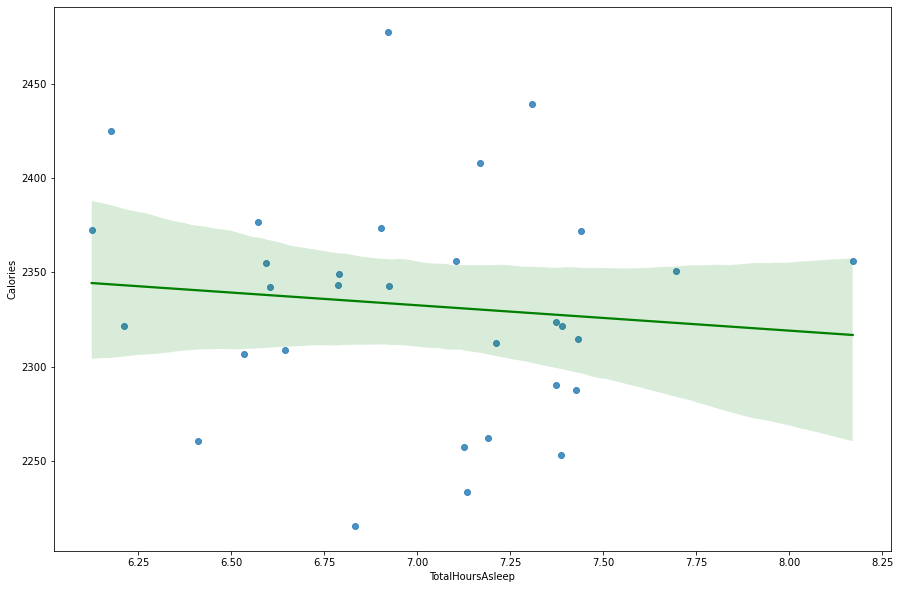

In [34]:
plt.figure(figsize=(15,10))
sns.regplot(data=AvgSleepByDate, x='TotalHoursAsleep', y='Calories', line_kws={'color':'green'})

The above plot attempts to find a relationship between average sleep time to the average amount of calories burnt.

Datapoints are rather scattered, which indicates no correlation between the two variables.

Users appear to sleep at a varied number of hours regardless of how many calories they have burned, and a notable example of this are datapoints that show upwards of 2450 calories burned, with less than 7 hours of sleep; and another that burns less than 2250 calories with less than 7 hours of sleep. 

Another relationship we may want to consider is sleep time and activity intensity. We may also be able to find active hours of the day when users are considered to be 'active' according to the device. 

In [35]:
# using the intensity table 
hourlyIntensities

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000
...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,12,0.200000
22095,8877689391,5/12/2016 11:00:00 AM,29,0.483333
22096,8877689391,5/12/2016 12:00:00 PM,93,1.550000
22097,8877689391,5/12/2016 1:00:00 PM,6,0.100000


In [36]:
# parse date and time 
hourlyIntensities['ActivityHour'] = hourlyIntensities['ActivityHour'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
hourlyIntensities

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,12,0.200000
22095,8877689391,2016-05-12 11:00:00,29,0.483333
22096,8877689391,2016-05-12 12:00:00,93,1.550000
22097,8877689391,2016-05-12 13:00:00,6,0.100000


In [37]:
# split them off and drop activity hour
hourlyIntensities['time'] = hourlyIntensities['ActivityHour'].apply(lambda x: x.time())
hourlyIntensities['date'] = hourlyIntensities['ActivityHour'].apply(lambda x: x.date())
hourlyIntensities = hourlyIntensities.drop(['ActivityHour'], axis=1)

hourlyIntensities

,Id,TotalIntensity,AverageIntensity,time,date
0,1503960366,20,0.333333,00:00:00,2016-04-12
1,1503960366,8,0.133333,01:00:00,2016-04-12
2,1503960366,7,0.116667,02:00:00,2016-04-12
3,1503960366,0,0.000000,03:00:00,2016-04-12
4,1503960366,0,0.000000,04:00:00,2016-04-12
...,...,...,...,...,...
22094,8877689391,12,0.200000,10:00:00,2016-05-12
22095,8877689391,29,0.483333,11:00:00,2016-05-12
22096,8877689391,93,1.550000,12:00:00,2016-05-12
22097,8877689391,6,0.100000,13:00:00,2016-05-12


In [38]:
# create a groupby for hourly visuals
Ints_hour = hourlyIntensities.groupby(['time'], as_index=False).agg({'TotalIntensity':'mean'})

In [39]:
Ints_hour

,time,TotalIntensity
0,00:00:00,2.129550
1,01:00:00,1.419078
2,02:00:00,1.043944
3,03:00:00,0.443730
4,04:00:00,0.633047
5,05:00:00,4.950644
6,06:00:00,7.771214
7,07:00:00,10.733620
8,08:00:00,14.668099
9,09:00:00,15.387755


In [40]:
# we need to cast time to a different dtype
Ints_hour['time'] = Ints_hour['time'].apply(lambda x: x.strftime('%H:%M:%S'))

In [41]:
Ints_hour

,time,TotalIntensity
0,00:00:00,2.129550
1,01:00:00,1.419078
2,02:00:00,1.043944
3,03:00:00,0.443730
4,04:00:00,0.633047
5,05:00:00,4.950644
6,06:00:00,7.771214
7,07:00:00,10.733620
8,08:00:00,14.668099
9,09:00:00,15.387755


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '01:00:00'),
  Text(2, 0, '02:00:00'),
  Text(3, 0, '03:00:00'),
  Text(4, 0, '04:00:00'),
  Text(5, 0, '05:00:00'),
  Text(6, 0, '06:00:00'),
  Text(7, 0, '07:00:00'),
  Text(8, 0, '08:00:00'),
  Text(9, 0, '09:00:00'),
  Text(10, 0, '10:00:00'),
  Text(11, 0, '11:00:00'),
  Text(12, 0, '12:00:00'),
  Text(13, 0, '13:00:00'),
  Text(14, 0, '14:00:00'),
  Text(15, 0, '15:00:00'),
  Text(16, 0, '16:00:00'),
  Text(17, 0, '17:00:00'),
  Text(18, 0, '18:00:00'),
  Text(19, 0, '19:00:00'),
  Text(20, 0, '20:00:00'),
  Text(21, 0, '21:00:00'),
  Text(22, 0, '22:00:00'),
  Text(23, 0, '23:00:00')])

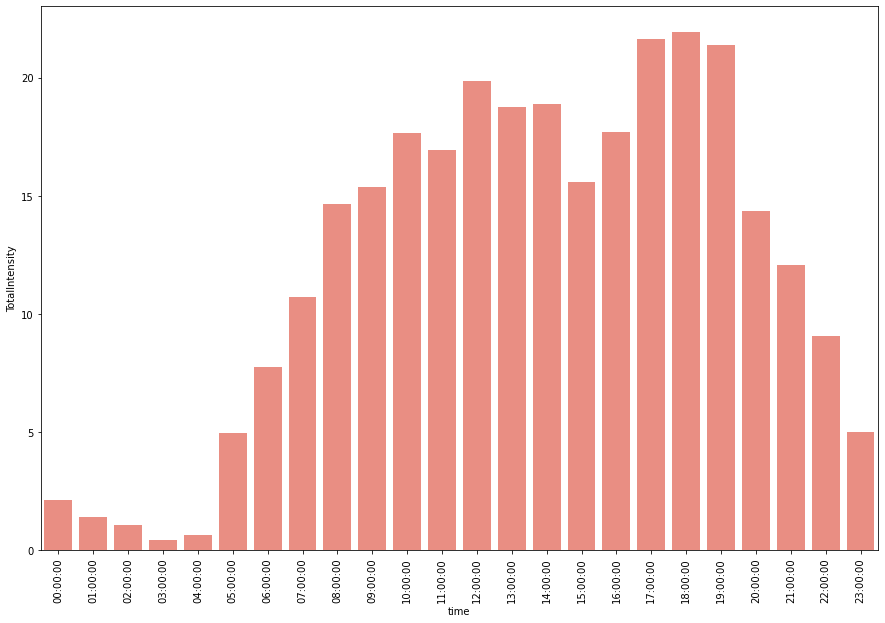

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(data=Ints_hour, x='time', y='TotalIntensity', color='salmon')
plt.xticks(rotation=90)

We note higher activity after 5AM. 

Average intensity reaches its peak at 5PM to 7PM, then reaching a dropoff after 8PM. 

Assuming that users have jobs, most activity appears to come from work itself, however these are based on averages - an aggregate, not an individual value. 

One more observation of note: the activity here does not explain why sedentary hours are high. Given the activity we see in the visualization, users should have a higher average of active hours (regardless of what type of active hour classification). This raises more questions than there are answers. 

In short, we will need more data to make a more business oriented decision.

### Recommendations:

- Orient Bellabeat's own activity tracker to enourage more activity during non-work hours, thereby reducing sedentary hours and increasing sleep time. 
- The definition of sedentary hours is broad - relinquishing logging to the users rather than being automated may increase the accuracy of data presented. Simply sitting down or laying back in a chair for long periods of time may be skewing data - which is a pain that most people in IT might feel, given that their jobs wholly consists of brain work, rather thanb physical activity. 
- Adding 'modes' to the application to further encourage or discourage specific activities might help users in the long term. For example, if users want to engage in more physical activities, the application would recommend higher dedicated times for workouts or cardio during non-active hours (early mornings), this will have to be tailored to users, however. Similarly, if users would like to get more sleep - the application would recommend power naps or longer sleep times by adjusting a user's schedule to work arounf their daily activities. 
- Implement a daily or weekly 'minimum' for steps taken as a placeholder to encourage users to stick to a recommended minimum set by established experts or organizations to keep healthy.